## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the csv file into a panda dataframe

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

## Before we begin linear regression, we must pre-process the data to make it more suitable for the regression model to work on 
### Converting categorical data to numerical data

In [4]:
X = data.drop(['price', 'CarName','car_ID' ], axis=1)  # replace 'target_variable' with your actual target variable
y = data['price']
data_cat = X.select_dtypes(include=['object'])  
data_num = X.select_dtypes(include=['number'])
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_num_norm = (data_num - mean) / std

data_cat_proc = pd.get_dummies(data_cat, drop_first=True) 
boolean_cols = data_cat_proc.columns[data_cat_proc.dtypes == 'bool']
data_cat_proc[boolean_cols] = data_cat_proc[boolean_cols].astype(int)
data_proc = pd.concat([data_num_norm, data_cat_proc], axis=1) 

<Axes: >

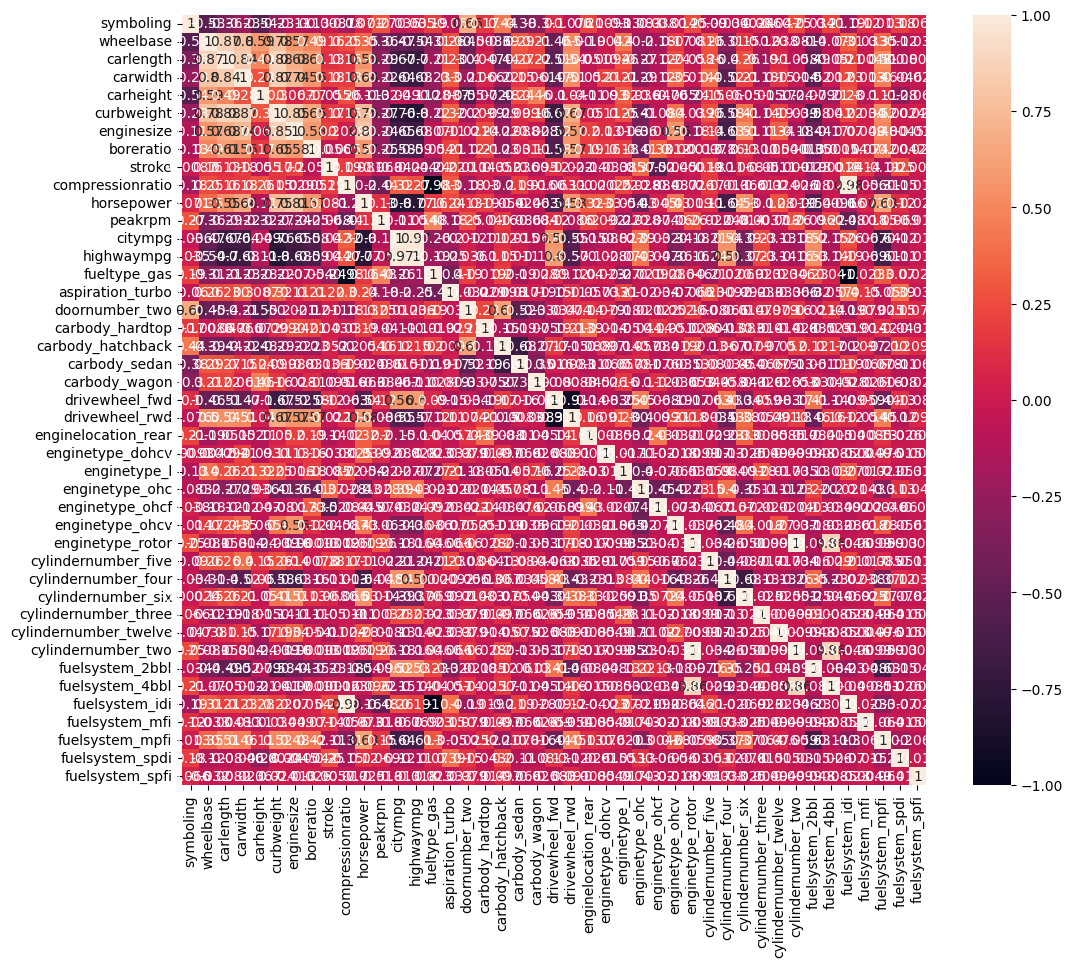

In [7]:
plt.figure(figsize=(12,10))
cor = data_proc.corr()
sns.heatmap(cor, annot=True)

In [10]:
def correlation(dataset, threshold = 0.85):
    column_cor = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                column_cor.add(colname)
    return column_cor
corr_features = correlation(data_proc, 0.85)
len(set(corr_features))

12

### Splitting given data into a dataset for training and another for testing

In [5]:

test_size = 0.3

n_samples = data_proc.shape[0]

n_test_samples = int(n_samples * test_size)
print(n_test_samples)

indices = np.arange(n_samples)
np.random.shuffle(indices)

# Split the data into training and testing sets
train_indices = indices[n_test_samples:]
test_indices = indices[:n_test_samples]

X_train = data_proc.iloc[train_indices]
y_train = y.iloc[train_indices]


X_test = data_proc.iloc[test_indices]
y_test = y.iloc[test_indices]
mse_values = []

61


## Performing Linear Regression
### Creating a class LinearRegression, setting its properties and defining its functions

In [11]:
class LinearRegression:
    def __init__(self, lr = 0.01, n_iters = 2000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for i in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            delw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            delb = (1/n_samples)*np.sum(y_predicted - y)
            self.weights = self.weights - self.lr*delw
            self.bias = self.bias - self.lr*delb
            mse = np.mean((y_predicted - y) ** 2)
            mse_values.append(mse)
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

### Creating Object to run linear regression on data

[10693.44598889  8782.67261432 33646.50592953  7410.10738737
 10521.83375798 12646.71081398  7025.55965416  6487.4356925
 21156.40497657  6837.00466    11280.60492917  7403.93056046
 26145.50563814  8690.70374546  5194.38666904  7268.36354093
 10574.69953038  6529.12225312 14862.39618771  5293.00108985
  6502.16197064  8586.42676405  7001.12856796 14396.90103957
  8463.45296648  2503.36037988 -3841.06369998  7607.15265332
 14242.53455496 12880.53212824 19895.77409271  6175.66916198
  8182.49744382 28250.7005448  25286.6388801   9519.06934036
  5033.52976892 14053.17122806 14579.56502497  9115.65072801
  8639.18422539 10365.084005   11276.35017267 17334.88132451
 29180.02594911  6194.21791473 18713.15527852 16579.71327215
 35988.94481565 19546.66706599 26104.98029533 20227.86927484
  9169.82099605  6405.2396235  44593.34715649  5446.8969367
  4537.16046536 20564.33723669 19869.46228521  5209.52060089
 18691.38269953]


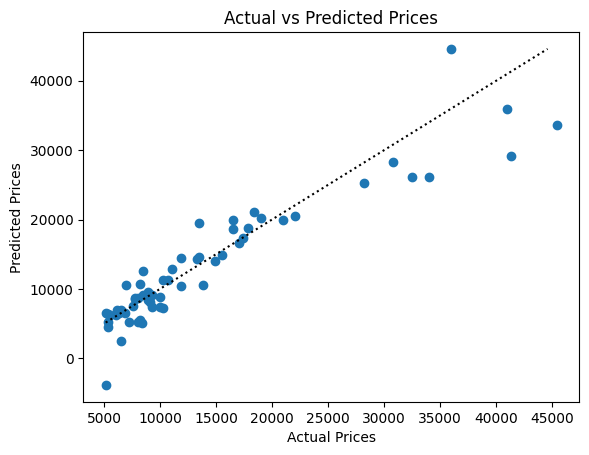

In [12]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)
print(predictions)
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(predictions)], [min(y_test), max(predictions)], 'k:')
plt.show()

## Depiction of change in MSE over iterations

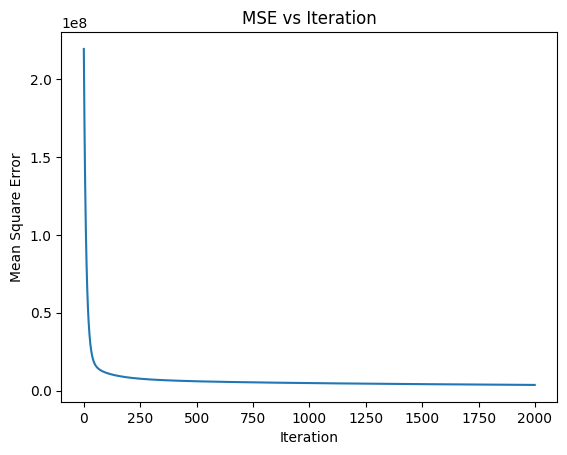

In [13]:
plt.plot(mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Iteration')
plt.show()

## Calculating R2 score

In [14]:

total_sum = np.sum((y_test - np.mean(y_test)) ** 2)
residual_sum = np.sum((y_test - predictions) ** 2)
r2 = 1 - (residual_sum/total_sum)
print(r2)

0.8662352743059577
